<a href="https://colab.research.google.com/github/PandeyChhaya/Concepts-and-Technology-of-AI/blob/main/240001_Chhaya_Pandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.


In [42]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
data = pd.read_csv(file_path)

print(data.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.82

2) . Identify the number of rows and columns in the dataset

In [9]:
rows,columns = data.shape;

print(f'Number of rows: {rows}');
print(f'Number of columns: {columns}');

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types

In [10]:
print(data.dtypes);

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


 Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [11]:
mean= data['score'].mean();
median= data['score'].median();
standardDeviation = data['score'].std();

print(f'The mean of score is :{mean}');
print(f'The median of score is: {median}');
print(f'The standard deviation of score is : {standardDeviation}');

The mean of score is :5.52758041958042
The median of score is: 5.785
The standard deviation of score is : 1.1707165099442995


 2) Identify the country with the highest and lowest happiness scores

In [17]:
#Country with highest happiness score
highest_score = data['score'].max()
highest_score_country = data.loc[data['score'] == highest_score,['Country name']].values[0][0]
print(f"The highest happiness score is:{highest_score} of {highest_score_country}" )

#Lowest happiness score
lowest_score = data['score'].min()
lowest_score_country =data.loc[data['score'] == lowest_score,['Country name']].values[0][0]
print(f"The lowest happiness score is:{lowest_score} of {lowest_score_country}" )

The highest happiness score is:7.741 of Finland
The lowest happiness score is:1.721 of Afghanistan


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [18]:
missingValues = data.isnull().sum();
print("Missing Values Count Per Column:\n", missingValues)

if missingValues.sum() > 0:
    print("\n Yes there are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset")


Missing Values Count Per Column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

 Yes there are missing values in the dataset.


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [20]:
filter = data[data['score'] > 7.5]
print(filter)


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [22]:
order_by_gdp =filter.sort_values(by='Log GDP per capita', ascending=False)
print(order_by_gdp.head(10))


  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [23]:

#------------------Adding New Column--------------------

#New Column Happiness_Category(Category based on Score)
scores=[]
for row in data['score']:
  if row > 6:
    scores.append('High')
  elif 4<=row<=6:
    scores.append('Medium')
  elif row < 4:
    scores.append('Low')
data['Happiness_Category'] = scores
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

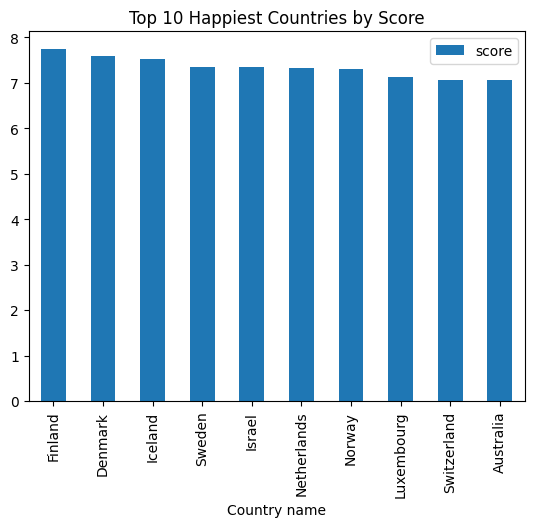

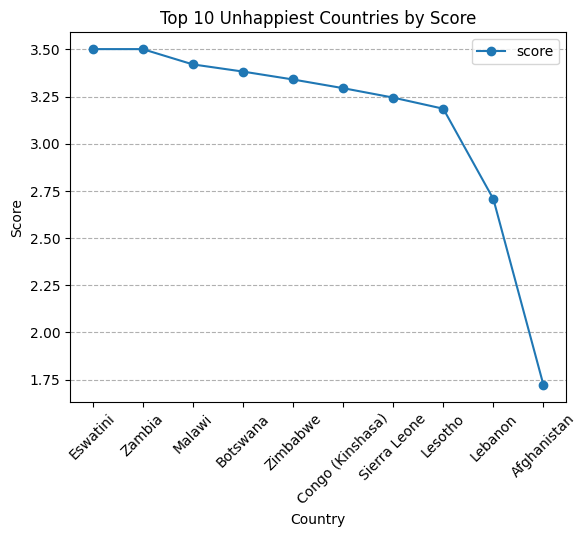

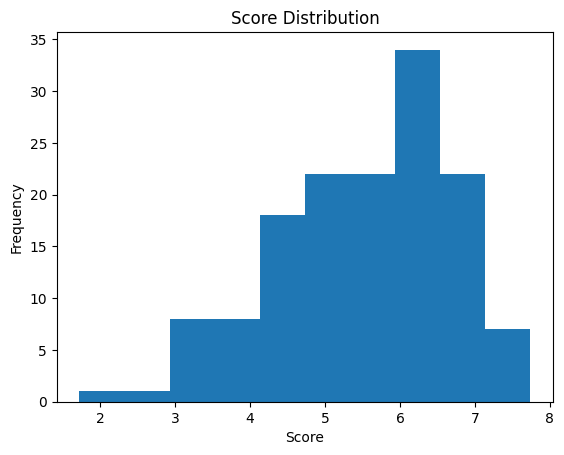

Text(0, 0.5, 'Score')

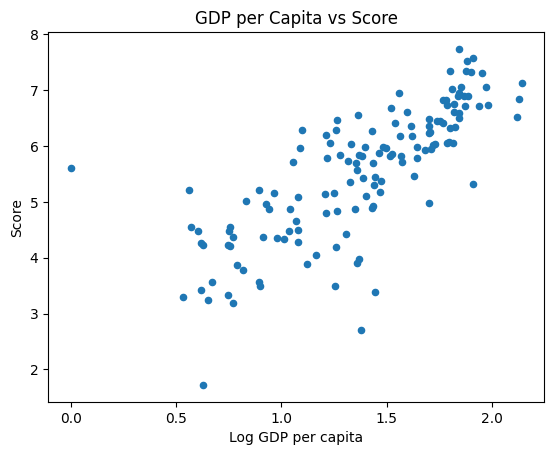

In [37]:
#--------------------Data Visualizations---------------------

#Plotting the top 10 happiest countries by Score in bar chart
happiest_countries = data.sort_values(by='score', ascending=False).head(10)
happiest_countries.plot(kind='bar', x='Country name', y='score', title='Top 10 Happiest Countries by Score')

#Plotting the top 10 unhappiest countries by Score in a Line graph
unhappiest_countries = data.sort_values(by='score', ascending=False).tail(10)
countries_plot=unhappiest_countries.plot(kind='line', x='Country name', y='score',marker='o', title='Top 10 Unhappiest Countries by Score')
countries_plot.set_xticks(range(len(unhappiest_countries)))
countries_plot.set_xticklabels(unhappiest_countries['Country name'],rotation=45)
countries_plot.set_xlabel('Country')
countries_plot.set_ylabel('Score')
countries_plot.grid(axis='y', linestyle='--')
plt.show()

#A histogram to show the Score column and its distribution
hist_plot = data['score'].plot(kind='hist', title='Score Distribution')
hist_plot.set_xlabel('Score')
hist_plot.set_ylabel('Frequency')
plt.show()

#A scatter plot between GDP per Capita and Score
scatter_plot = data.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score')
scatter_plot.set_xlabel('Log GDP per capita')
scatter_plot.set_ylabel('Score')

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [26]:
#-----------------------------Some Advance Data Exploration Task--------------------------

#Preparing the South-Asia Dataset
south_asian_countires = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

#Filter the matching data from the list
filter_data_south_asian = data[data['Country name'].isin(south_asian_countires)]

#Save in a new dataset
south_asian_countries_csv = filter_data_south_asian.to_csv('south_asian_countries.csv', index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
0                      0.115                1.783             Medium   
1                      0.074                1.907       

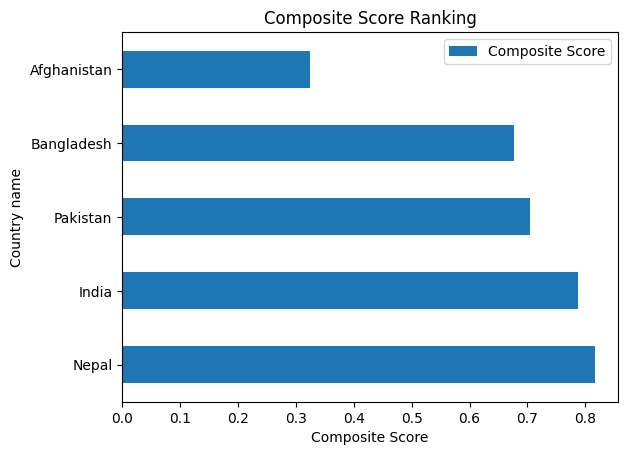

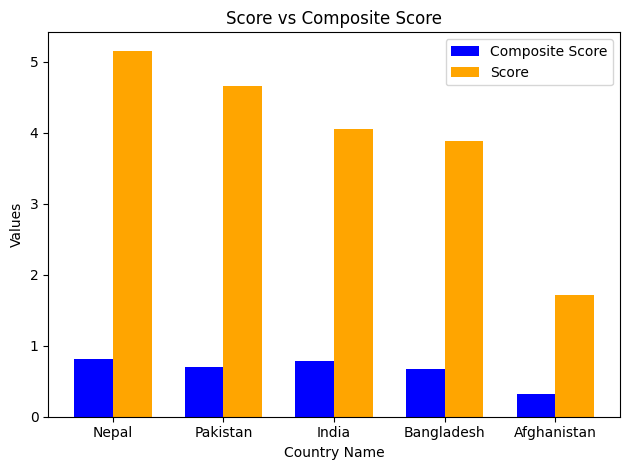

In [38]:
#--------------------------Composite Score Ranking--------------------------
#Reading the southasia dataframe
south_asia = pd.read_csv('/content/south_asian_countries.csv')

#Creating a New Column Composite Score
south_asia['Composite Score'] = 0.4 * south_asia['Log GDP per capita'] + 0.3 * south_asia['Social support'] + 0.3 * south_asia['Healthy life expectancy']
print(south_asia.head(10))
#Ranking Based on composite Score(Descending)
rank_composite_score = south_asia.sort_values(by='Composite Score', ascending=False)

#Bar Graph for the top 5 countries(Horizontal Bar Chart)
bar_plot = rank_composite_score.plot(kind='barh', x='Country name', y='Composite Score',title='Composite Score Ranking')
plt.xlabel("Composite Score")
plt.show()
#Score vs Composite Score

# Plot Composite Score bars
x = range(len(south_asia))
width = 0.35
plt.bar(x, south_asia['Composite Score'], width, label='Composite Score', color='blue')

# Plot Score bars next to Composite Score
plt.bar([p + width for p in x], south_asia['score'], width, label='Score', color='orange')
plt.title('Score vs Composite Score')
plt.xlabel('Country Name')
plt.ylabel('Values')
plt.xticks([p + width / 2 for p in x], south_asia['Country name'])
plt.tight_layout()
plt.legend()
plt.show()


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

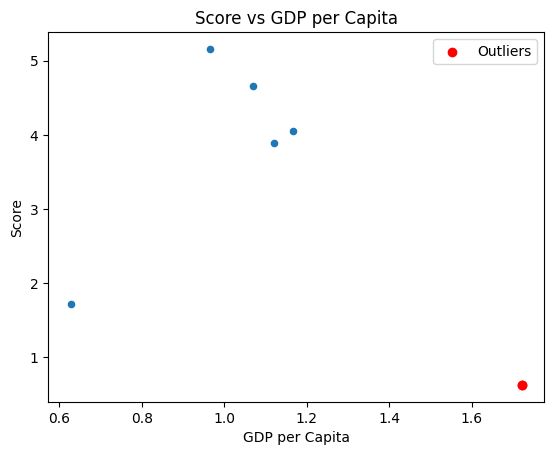

In [39]:
#----------------------------Outlier Detection------------------------------

#Using the 1.5 * IQR rule
def find_outliers(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
south_asia_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='Score vs GDP per Capita')
south_asia_plot.set_xlabel('GDP per Capita')
south_asia_plot.set_ylabel('Score')

outliers = pd.concat([find_outliers('score'), find_outliers('Log GDP per capita')])
south_asia_plot.scatter(outliers['score'], outliers['Log GDP per capita'], color='red', label='Outliers')
south_asia_plot.legend()
plt.show()

Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88


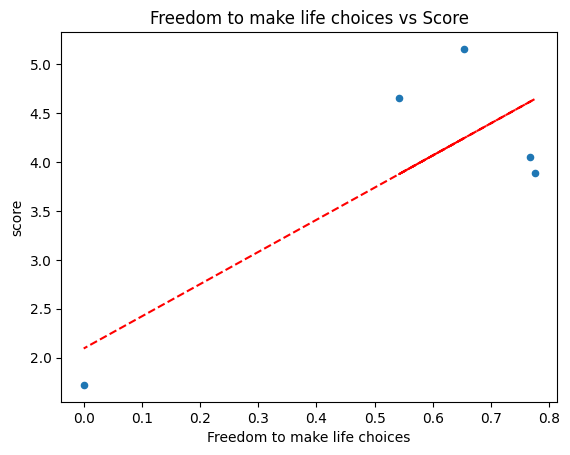

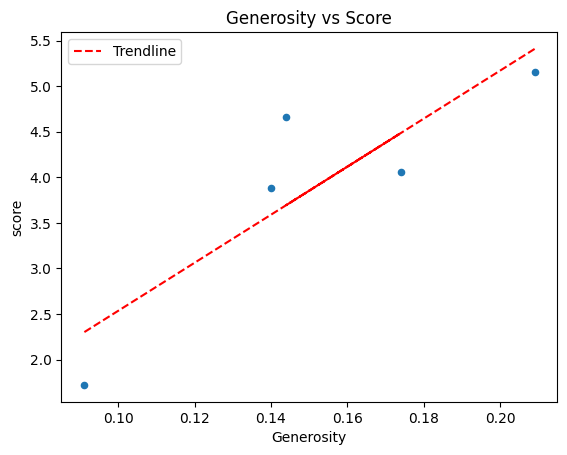

In [43]:
#-------------------Exploring Trends Across Metrices-----------------------------


#Calculating the pearson correlation(Freedom to Make Life Choices and Generosity)
corr_life_choices = south_asia['Freedom to make life choices'].corr(south_asia['score'],method='pearson')
corr_generosity = south_asia['Generosity'].corr(south_asia['score'],method = 'pearson')
print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity:.2f}")

#Scatter plot (Freedom to make life Choices against Score)
life_choices_plot = south_asia.plot(kind='scatter', x='Freedom to make life choices', y='score', title='Freedom to make life choices vs Score')\

#Making a trendline for Freedon to make Life Choice
life_choices_z = np.polyfit(south_asia['Freedom to make life choices'], south_asia['score'], 1)
life_choices_p = np.poly1d(life_choices_z)
life_choices_plot.plot(south_asia['Freedom to make life choices'], life_choices_p(south_asia['Freedom to make life choices']), color='red', linestyle='--', label='Trendline')

#Scatter plot (Generosity against Score)
generosity_plot = south_asia.plot(kind='scatter', x='Generosity', y='score', title='Generosity vs Score')

#Making a trendline for Generosity
generosity_z = np.polyfit(south_asia['Generosity'], south_asia['score'], 1)
generosity_p = np.poly1d(generosity_z)
generosity_plot.plot(south_asia['Generosity'], generosity_p(south_asia['Generosity']), color='red', linestyle='--', label='Trendline')

plt.legend()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628           0.000   
3   Bangladesh  3.886               1.122           0.249   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
0        Nepal  5.158               0.965           0.990   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                         0.000       0.091   
3                    0.513                         0.775       0.140   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
0                    0.443                         0.653       0.209   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   
3                      0.167                0.919       

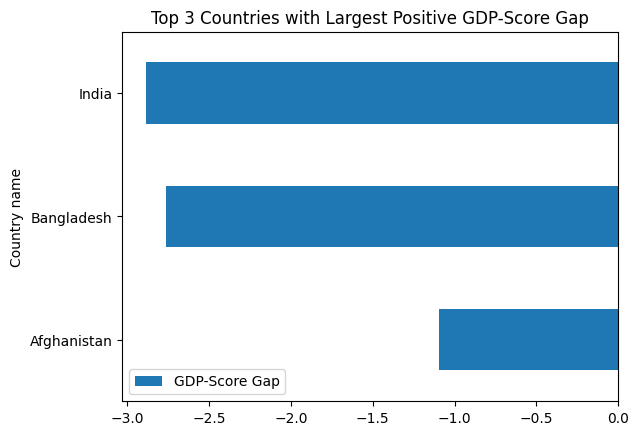

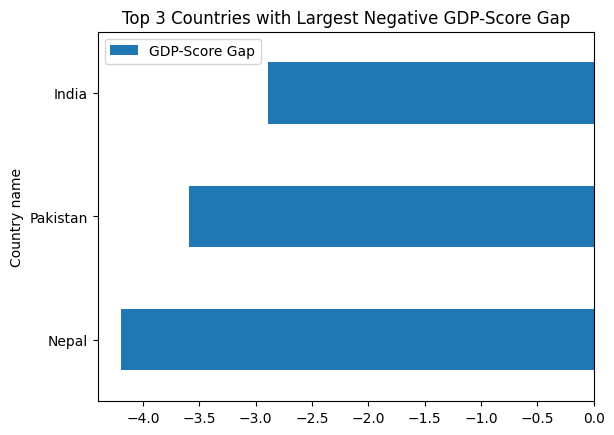

In [30]:
#--------------------Gap Analysis-----------------------------

#Creating a new column GDP-Score Gap
south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']

rank_gdp_score_gap = south_asia.sort_values(by='GDP-Score Gap', ascending=False)
rank_gdp_score_gap_asc = south_asia.sort_values(by='GDP-Score Gap', ascending=True)
top_three_countries = rank_gdp_score_gap.head(3)

#bar plot for the top three countries
top_three_countries_plot = top_three_countries.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Positive GDP-Score Gap')
#largest negative gaps bar graph
largest_negative_gaps = rank_gdp_score_gap_asc.head(3)
largest_negative_gaps_plot = largest_negative_gaps.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Negative GDP-Score Gap')

print(rank_gdp_score_gap.head(10))
print(rank_gdp_score_gap_asc.head(10))

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [32]:
#----------------------Comparative Analysis------------------------------
#Task 1
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_east_csv = data[data['Country name'].isin(middle_east_countries)]
middle_east_csv.to_csv('middle_east_countries.csv')

middle_east_data = pd.read_csv('/content/middle_east_countries.csv')

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [33]:
#-------------------------------Descriptive Statistics-----------------------------
mean_score_middle_east  = middle_east_data['score'].mean()
mean_score_south_asia = south_asia['score'].mean()
print(f"The mean score of middle east countries is:{mean_score_middle_east:.2f}")
print(f"The mean score of south asia countries is:{mean_score_south_asia:.2f}")
if mean_score_middle_east > mean_score_south_asia:
  print(f"Middle East countries have a higher mean score than South Asia countries\nMiddle East Score:{mean_score_middle_east:.2f}")
else:
  print(f"South Asia countries have a higher mean score than Middle East countries.{mean_score_south_asia:.2f}")

std_middle_east = middle_east_data['score'].std()
std_south_asia = south_asia['score'].std()
print(f"The standard deviation of middle east countries is:{std_middle_east:.2f}")
print(f"The standard deviation of south asia countries is:{std_south_asia:.2f}")

The mean score of middle east countries is:5.41
The mean score of south asia countries is:3.90
Middle East countries have a higher mean score than South Asia countries
Middle East Score:5.41
The standard deviation of middle east countries is:1.57
The standard deviation of south asia countries is:1.32


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.
3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

[Text(0, 0, 'Lebanon'), Text(1, 0, 'Yemen'), Text(2, 0, 'Jordan')]

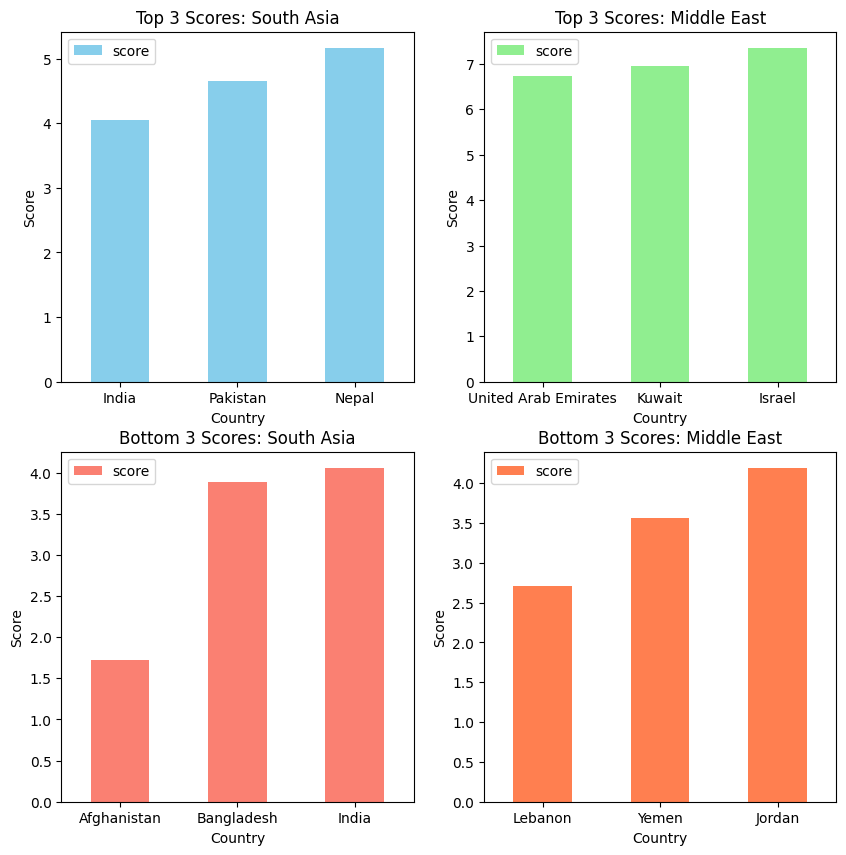

In [44]:
#------------------Top and Bottom Performers-------------------------------
#Top 3 and bottom 3 from south asia
south_asia_bottom3 = south_asia.sort_values(by='score').head(3)
south_asia_top3 = south_asia.sort_values(by='score').tail(3)

#top3 and bottom 3 from middle east
middle_east_bottom3 = middle_east_data.sort_values(by='score').head(3)
middle_east_top3 = middle_east_data.sort_values(by='score').tail(3)

#Top 3 bar chart

fig, axes = plt.subplots(2, 2,figsize=(10,10))
south_asia_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 3 Scores: South Asia')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=360)

# Top 3 Scores for Middle East (Second subplot)
middle_east_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Top 3 Scores: Middle East')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(),rotation=360)

# Bottom 3 Scores for South Asia (Third subplot)
south_asia_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Bottom 3 Scores: South Asia')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=360)

# Bottom 3 Scores for Middle East (Fourth subplot)
middle_east_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Bottom 3 Scores: Middle East')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=360)


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [45]:
#--------------------------Happiness Disparity---------------------------------
south_asia_variability = south_asia['score'].max()-south_asia['score'].min()
middle_east_variability = middle_east_data['score'].max()-middle_east_data['score'].min()

#find the coefficient of variation of both regions
CV_south_asia = south_asia['score'].std()/south_asia['score'].mean()
CV_middle_east = middle_east_data['score'].std()/middle_east_data['score'].mean()

print(f"The variability of South Asia is:{south_asia_variability:.2f}")
print(f"The variability of Middle East is:{middle_east_variability:.2f}")
print(f"The coefficient of variation of South Asia is:{CV_south_asia:.2f}")
print(f"The coefficient of variation of Middle East is:{CV_middle_east:.2f}")

The variability of South Asia is:3.44
The variability of Middle East is:4.63
The coefficient of variation of South Asia is:0.34
The coefficient of variation of Middle East is:0.29


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88
The correlation between Freedom to make life choices and score is: 0.86
The correlation between Generosity and score is: 0.63


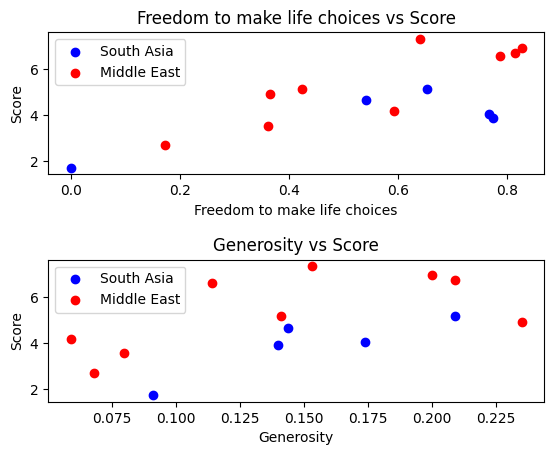

In [46]:
#------------------------Correlation Analysis-----------------------------
corr_life_choices_south_asia = south_asia['Freedom to make life choices'].corr(south_asia['score'],method='pearson')
corr_generosity_south_asia = south_asia['Generosity'].corr(south_asia['score'],method = 'pearson')

print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_south_asia:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_south_asia:.2f}")


corr_life_choices_middle_east = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'],method='pearson')
corr_generosity_middle_east = middle_east_data['Generosity'].corr(middle_east_data['score'],method = 'pearson')
print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_middle_east:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_middle_east:.2f}")
#scatter plot the combined data with different labels for each
plt.subplot(2, 1, 1)
plt.scatter(south_asia['Freedom to make life choices'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_data['Freedom to make life choices'], middle_east_data['score'], label='Middle East', color='red')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Freedom to make life choices vs Score')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(south_asia['Generosity'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_data['Generosity'], middle_east_data['score'], label='Middle East', color='red')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs Score')
plt.subplots_adjust(hspace=0.6)
plt.legend()
plt.show()



Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   

   Composite Score  
4           0.3238  
No Outliers
  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   

   Composite Score  
4           0.3238  
No Outliers


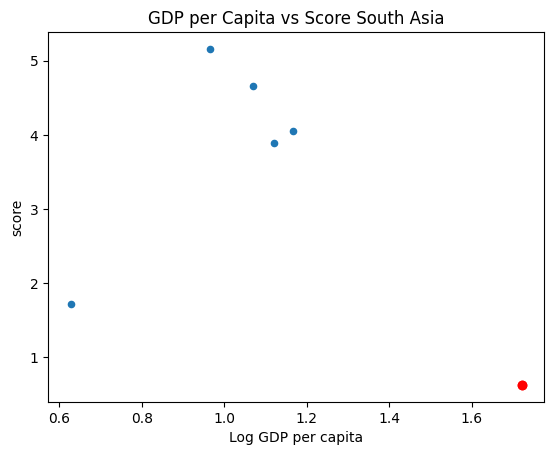

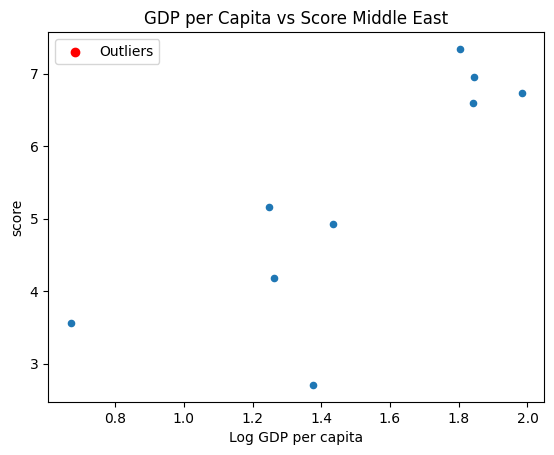

In [47]:
#------------------------------Outlier Detection---------------------------------------
def find_outliers_south_asia(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
def find_outliers_middle_east(column_name):
    Q1 = middle_east_data[column_name].quantile(0.25)
    Q3 = middle_east_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return middle_east_data[(middle_east_data[column_name]<lower_bound) | (middle_east_data[column_name]>upper_bound)]
if find_outliers_south_asia('score').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('score'))

if find_outliers_middle_east('score').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('score'))

if find_outliers_south_asia('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('Log GDP per capita'))

if find_outliers_middle_east('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('Log GDP per capita'))

#Plotting the outliers for each region
south_asia_normal_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score South Asia')
middle_east_normal_plot = middle_east_data.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score Middle East')
outliers_south_asia = pd.concat([find_outliers_south_asia('score'), find_outliers_south_asia('Log GDP per capita')])
outliers_middle_east = pd.concat([find_outliers_middle_east('score'), find_outliers_middle_east('Log GDP per capita')])
south_asia_normal_plot.scatter(outliers_south_asia['score'], outliers_south_asia['Log GDP per capita'], color='red', label='Outliers')
middle_east_normal_plot.scatter(outliers_middle_east['score'], outliers_middle_east['Log GDP per capita'], color='red', label='Outliers')
plt.legend()


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

<Figure size 800x600 with 0 Axes>

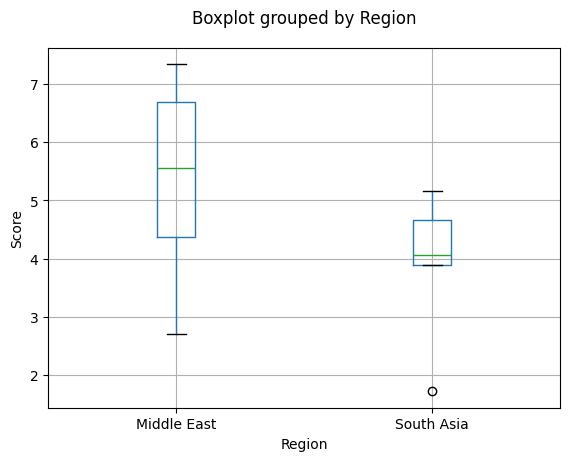

In [48]:

#------------------------Visualization------------------------------

#Box plot for comparing Score between South Asia and Middle East

south_asia['Region'] ='South Asia'
middle_east_data['Region'] = 'Middle East'
combined_data = pd.concat([south_asia, middle_east_data])
plt.figure(figsize=(8, 6))
combined_data.boxplot(column='score',by='Region')
plt.title('')
plt.ylabel('Score')
plt.show()